<a href="https://colab.research.google.com/github/CDFire/ProjectsInAI-ML/blob/main/hw3/ProjectsInAIML_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Part 1

**Dataset:** https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

I would like to build a binary classifier that can accurately detect fraudulent transactions.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
class NeuralNetwork:
  # Initializes neural network with random weights and zero biases.
  def __init__(self, input_size, hidden_sizes, output_size, learning_rate, n_iter):
    # If hidden_sizes is integer, convert it to a list.
    if isinstance(hidden_sizes, int):
      hidden_sizes = [hidden_sizes]
    self.input_size = input_size
    self.hidden_sizes = hidden_sizes
    self.output_size = output_size
    self.learning_rate = learning_rate
    self.n_iter = n_iter

    # Initialize weights and biases for each layer.
    self.weights = []
    self.biases = []

    # First hidden layer
    self.weights.append(np.random.randn(input_size, hidden_sizes[0]) * np.sqrt(2. / input_size))
    self.biases.append(np.zeros((1, hidden_sizes[0])))

    # Additional hidden layers
    for i in range(1, len(hidden_sizes)):
      self.weights.append(np.random.randn(hidden_sizes[i-1], hidden_sizes[i]) * np.sqrt(2. / hidden_sizes[i-1]))
      self.biases.append(np.zeros((1, hidden_sizes[i])))

    # Output layer
    self.weights.append(np.random.randn(hidden_sizes[-1], output_size) * np.sqrt(2. / hidden_sizes[-1]))
    self.biases.append(np.zeros((1, output_size)))

  # Sigmoid activation function
  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

  # Sigmoid derivative
  def sigmoid_derivative(self, z):
    return z * (1 - z)

  # ReLU activation function
  def relu(self, z):
    return np.maximum(0, z)

  # ReLU derivative
  def relu_derivative(self, z):
    dz = np.array(z)
    dz[z <= 0] = 0
    dz[z > 0] = 1
    return dz

  # Forward propagation
  def forward(self, X):
    # Lists to store linear combinations and activations for each layer.
    self.Zs = []
    self.As = [X]

    # Loop through each layer.
    for i in range(len(self.weights)):
      # Hidden layer linear step
      z = np.dot(self.As[i], self.weights[i]) + self.biases[i]
      self.Zs.append(z)
      # For hidden layers, use ReLU activation. For the output layer, use sigmoid.
      if i == len(self.weights) - 1:
        a = self.sigmoid(z)
      else:
        a = self.relu(z)
      self.As.append(a)

    return self.As[-1]

  # Cost function
  def cost(self, y, output):
    m = y.shape[0]
    epsilon = 1e-8
    cost = -np.sum(y * np.log(output + epsilon) + (1 - y) * np.log(1 - output + epsilon)) / m
    return cost

  # Backward propagation
  def backward(self, y):
    m = y.shape[0]
    L = len(self.weights)
    dZ = [None] * L
    dW = [None] * L
    db = [None] * L

    # Calculate the gradient for the output layer.
    dZ[L-1] = self.As[-1] - y
    dW[L-1] = np.dot(self.As[L-1].T, dZ[L-1]) / m
    db[L-1] = np.sum(dZ[L-1], axis=0, keepdims=True) / m

    # Backpropagate error to hidden layers.
    for i in range(L-2, -1, -1):
      dA = np.dot(dZ[i+1], self.weights[i+1].T)
      dZ[i] = dA * self.relu_derivative(self.Zs[i])
      dW[i] = np.dot(self.As[i].T, dZ[i]) / m
      db[i] = np.sum(dZ[i], axis=0, keepdims=True) / m

    # Update weights and biases with gradient descent.
    for i in range(L):
      self.weights[i] -= self.learning_rate * dW[i]
      self.biases[i]  -= self.learning_rate * db[i]

  # Train model
  def train(self, X, y):
    for i in range(self.n_iter):
      # Forward propagation
      output = self.forward(X)

      # Output cost updates
      if i % 100 == 0:
        cost_value = self.cost(y, output)
        print(f"Iteration {i}: cost = {cost_value:.4f}")

      # Backward propagation
      self.backward(y)

  # Predict X
  def predict(self, X):
    # Forward propagation.
    output = self.forward(X)
    # Convert probabilities into binary class labels
    predictions = (output > 0.5).astype(int)
    return predictions

In [ ]:
# Load dataset
data = pd.read_csv('creditcard.csv')
data.dropna(inplace=True)

# Split dataset into data and labels
X = data.drop('Class', axis=1)
y = data['Class']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y)

# Convert to 2D numpy array for neural network use
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [ ]:
# Create neural network
nn = NeuralNetwork(input_size=X_train.shape[1], hidden_sizes=[16, 8], output_size=1, learning_rate=0.001, n_iter=5000)

# Train the neural network
nn.train(X_train, y_train)

Iteration 0: cost = 0.9820
Iteration 100: cost = 0.7341
Iteration 200: cost = 0.5773
Iteration 300: cost = 0.4718
Iteration 400: cost = 0.3971
Iteration 500: cost = 0.3415
Iteration 600: cost = 0.2987
Iteration 700: cost = 0.2647
Iteration 800: cost = 0.2369
Iteration 900: cost = 0.2139
Iteration 1000: cost = 0.1946
Iteration 1100: cost = 0.1781
Iteration 1200: cost = 0.1639
Iteration 1300: cost = 0.1516
Iteration 1400: cost = 0.1408
Iteration 1500: cost = 0.1313
Iteration 1600: cost = 0.1229
Iteration 1700: cost = 0.1155
Iteration 1800: cost = 0.1088
Iteration 1900: cost = 0.1028
Iteration 2000: cost = 0.0974
Iteration 2100: cost = 0.0926
Iteration 2200: cost = 0.0882
Iteration 2300: cost = 0.0841
Iteration 2400: cost = 0.0805
Iteration 2500: cost = 0.0771
Iteration 2600: cost = 0.0740
Iteration 2700: cost = 0.0712
Iteration 2800: cost = 0.0686
Iteration 2900: cost = 0.0662
Iteration 3000: cost = 0.0639
Iteration 3100: cost = 0.0619
Iteration 3200: cost = 0.0599
Iteration 3300: cost =

In the end, I decided to stick with my original gradient descent function. I implemented mini-batch gradient descent to see if it would help, but it didn't have a huge impact on the runtime and overall just wasn't much different. The neural network didn't take too long to train in the first place ~10-20 minutes so I just stuck with my original implementation.

In [ ]:
# Evaluate the model on the test set
predictions = nn.predict(X_test)
accuracy = np.mean(predictions == y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9982795547909132


# Part 2

Here are the resources I used and why they were essential:
1. PyTorch Tutorials: Build a Model from Scratch: https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

  I have worked with pytorch a few times, but even so, I find myself going back to this tutorial when making a new model. This resource is invaluable for understanding how to structure neural networks and keep track of computations.

2. Deep Learning with PyTorch: A 60 Minute Blitz: https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

  This video is a great comprehensive overview of building neural networks in PyTorch. It reinforces the concepts from the first resource and gave me practical examples on how to implement a simple 2-layer network, including loss computation and optimization.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
data = pd.read_csv("creditcard.csv")

**Exploratory Data Analysis:**

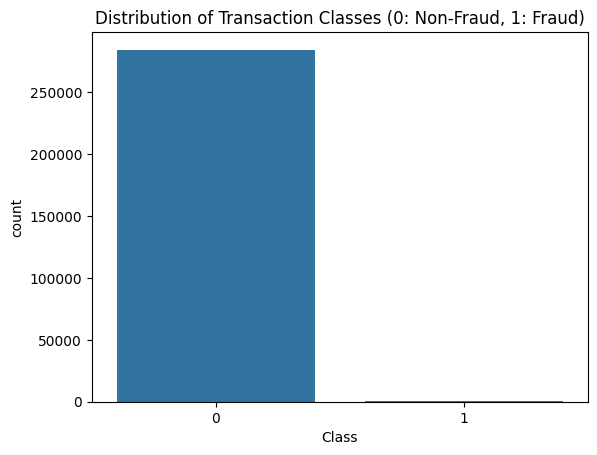

In [ ]:
# Remove rows with Na values
data.dropna(inplace=True)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Show distribution of classes
sns.countplot(x="Class", data=data)
plt.title("Distribution of Transaction Classes (0: Non-Fraud, 1: Fraud)")
plt.show()

**train-dev-test split:**

In [ ]:
# Split the data:
# Use 20% as test data.
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y)

# From remaining 80%, use 20% as a development set.
X_train, X_dev, y_train, y_dev = train_test_split(X_temp, y_temp, test_size=0.2, stratify=y_temp)

# Convert data to pytorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_dev = torch.tensor(X_dev, dtype=torch.float32)
y_dev = torch.tensor(y_dev.values, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

**forward propagation:**

In [ ]:
class TwoLayerNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(TwoLayerNN, self).__init__()
        # First fully connected layer
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # ReLU activation for the hidden layer
        self.relu = nn.ReLU()
        # Second fully connected layer
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        # Sigmoid activation for the output layer (for binary classification)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

In [ ]:
# Hyper-parameters
input_dim = X_train.shape[1]   # number of features: 30
hidden_dim = 16                # hidden layer size of 16
output_dim = 1
num_epochs = 10
batch_size = 128
learning_rate = 0.001

# Instantiate the model with chosen hyperparameters
model = TwoLayerNN(input_dim, hidden_dim, output_dim)

**cost function**

In [ ]:
# Use binary cross entropy loss for the cost function
criterion = nn.BCELoss()

Implement gradient descent

In [ ]:
# Use Adam optimizer for model training
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Create DataLoader for mini-batch training
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in train_loader:
        # Forward propagation
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * batch_X.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)

    # Evaluate on the development set at each epoch
    model.eval()
    with torch.no_grad():
        dev_outputs = model(X_dev)
        dev_loss = criterion(dev_outputs, y_dev).item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Dev Loss: {dev_loss:.4f}")

Epoch [1/10], Train Loss: 0.0798, Dev Loss: 0.0053
Epoch [2/10], Train Loss: 0.0046, Dev Loss: 0.0034
Epoch [3/10], Train Loss: 0.0036, Dev Loss: 0.0031
Epoch [4/10], Train Loss: 0.0032, Dev Loss: 0.0029
Epoch [5/10], Train Loss: 0.0030, Dev Loss: 0.0028
Epoch [6/10], Train Loss: 0.0029, Dev Loss: 0.0029
Epoch [7/10], Train Loss: 0.0028, Dev Loss: 0.0028
Epoch [8/10], Train Loss: 0.0026, Dev Loss: 0.0030
Epoch [9/10], Train Loss: 0.0026, Dev Loss: 0.0028
Epoch [10/10], Train Loss: 0.0025, Dev Loss: 0.0028


**results:**

In [ ]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    # Convert probabilities to binary predictions
    test_predictions = (test_outputs >= 0.5).float()

    # Calculate accuracy
    test_accuracy = (test_predictions.eq(y_test).sum().item()) / y_test.shape[0]
    print("\nTest Accuracy:", test_accuracy)

    # Convert predictions and labels to NumPy arrays for metric calculations
    y_test_np = y_test.cpu().numpy()
    test_predictions_np = test_predictions.cpu().numpy()

    # Calculate Precision, Recall, and F1-score
    precision = precision_score(y_test_np, test_predictions_np)
    recall = recall_score(y_test_np, test_predictions_np)
    f1 = f1_score(y_test_np, test_predictions_np)

    print("Test Precision: {:.4f}".format(precision))
    print("Test Recall: {:.4f}".format(recall))
    print("Test F1-Score: {:.4f}".format(f1))


Test Accuracy: 0.9994733330992591
Test Precision: 0.9722
Test Recall: 0.7143
Test F1-Score: 0.8235


Hyperparameter Selection:

I initially set the hidden layer size to 16 based on a balance between model capacity and simplicity. Given that my task is binary classification on the credit card fraud dataset (which has a relatively straightforward decision boundary for distinguishing fraud from non-fraud), a modest number of hidden neurons was sufficient. Preliminary experiments with larger sizes (e.g., 32 or 64 neurons) did not yield significant performance improvements and only worsened overfitting.

I started with a learning rate of 0.001. This value was chosen because it typically provides a good balance between convergence speed and stability. I performed a few trials to ensure that the training loss decreased smoothly without oscillations, confirming that this learning rate was appropriate for the problem.

A batch size of 128 was selected to balance between the stability of gradient estimates and computational efficiency. Smaller batches can introduce too much noise into the gradient estimates, while very large batches could slow down training and potentially require more memory than is available. The chosen batch size provided stable updates and efficient training given the size of the dataset.

I set the number of epochs to 10. More epochs were not necessary to reach convergence.

In this project, I did not apply explicit regularization techniques such as dropout or L2 weight decay. The credit card fraud dataset is quite large, which helps mitigate overfitting even with a relatively simple network. In addition, the neural network architecture is a 2-layer network meaning that the model capacity is not excessively high for this task.

I chose to use Adam as the optimizer because it automatically adjusts the learning rates for individual parameters based on the first and second moments of the gradients. This adaptive behavior generally leads to faster convergence, especially on problems with noisy or sparse gradients. This was an important consideration in this fraud detection where the minority class is underrepresented.

# Task 4

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
data = pd.read_csv("creditcard.csv")
data.dropna(inplace=True)
X = data.drop("Class", axis=1)
y = data["Class"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Dev-Test split
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y)
X_train, X_dev, y_train, y_dev = train_test_split(X_temp, y_temp, test_size=0.2, stratify=y_temp)

# Convert to NumPy arrays.
X_train_np = X_train
X_dev_np = X_dev
X_test_np = X_test
y_train_np = y_train.values
y_dev_np = y_dev.values
y_test_np = y_test.values

# Train the Logistic Regression model
baseline_model = LogisticRegression(max_iter=1000, class_weight='balanced')
baseline_model.fit(X_train_np, y_train_np)

# Evaluate
lr_predictions = baseline_model.predict(X_test_np)

# Compute metrics
lr_accuracy = accuracy_score(y_test_np, lr_predictions)
lr_precision = precision_score(y_test_np, lr_predictions)
lr_recall = recall_score(y_test_np, lr_predictions)
lr_f1 = f1_score(y_test_np, lr_predictions)

print("Logistic Regression Baseline Results:")
print("Accuracy:  {:.4f}".format(lr_accuracy))
print("Precision: {:.4f}".format(lr_precision))
print("Recall:    {:.4f}".format(lr_recall))
print("F1-Score:  {:.4f}".format(lr_f1))

Logistic Regression Baseline Results:
Accuracy:  0.9802
Precision: 0.0722
Recall:    0.8878
F1-Score:  0.1335


Neural Network has high precision (97.22%), meaning that when it predicts a transaction as fraud, it is almost always correct. However, its recall is lower (71.43%), which indicates that it misses some fraud cases. Logistic regression, on the other hand, achieves a high recall (88.78%), so it catches most of the actual fraud cases, but its precision is extremely low (7.22%). This indicates that it generates a large number of false positives.
The F1-score is much higher for the neural network (~82.35%) compared to logistic regression (~13.35%). This suggests that overall, the NN provides a much more reliable performance.

The NN is capable of learning non-linear relationships in the data. Fraud detection often involves complex patterns and interactions among features, which a neural network can capture effectively. The NN’s hidden layers allow it to build more sophisticated decision boundaries. Logistic regression on the other hand, is a linear model, meaning it can only capture linear relationships. In an imbalanced and complex dataset like credit card fraud, a linear decision boundary may not be sufficient, leading to poor precision despite a high recall. In addition, we are working with a highly imbalanced dataset. The decision threshold can greatly affect performance metrics. Logistic regression in this case, might have been adjusted to favor recall at the cost of precision, resulting in many false positives.

In fraud detection, high precision is crucial because each false positive can result in unnecessary investigations or customer inconvenience. The neural network’s high precision makes it far more practical for real-world applications.
	•	Model Interpretability vs. Performance:
	•	While logistic regression is more interpretable, its performance in this context is significantly worse. In situations where performance is paramount (and additional techniques can be used to interpret NN decisions), the neural network’s improved metrics are a compelling advantage.